# Isolation Forest Implementation in Python

#### Isolation Forest
Isolation forest is an ensemble method for anomaly detection that isolates anomalies rather than profiling normal data. The algorithm randomly selects a feature and a split value to partition the data, creating trees where anomalies are easier to isolate due to their sparse distribution. ANomalises are identified based on their shorter path lengths in the tree structure, as they are isolated faster than normal points.

Predictions: [ 1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


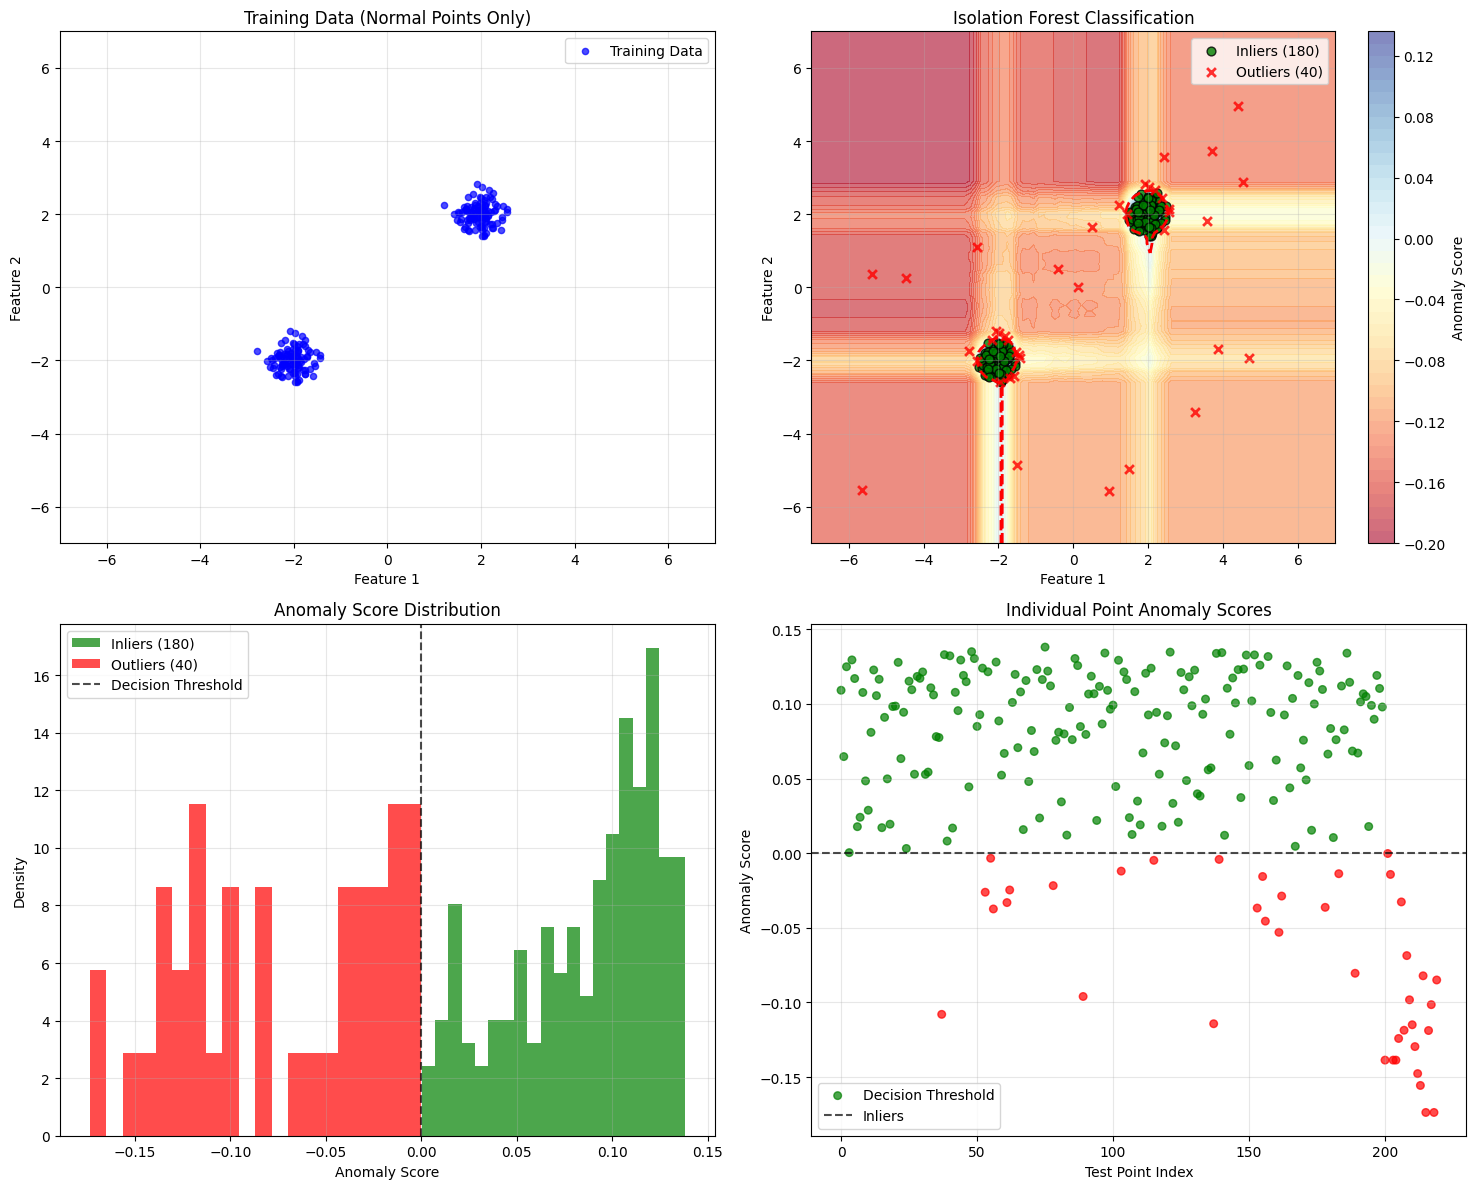

=== ISOLATION FOREST ANALYSIS ===
Total training points: 200
Total test points: 220
Expected contamination: 0.1

Classification Results:
Predictions: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1 -1 -1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1 -1 -1  1  1  1  1 -1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
Anomaly Scores: [ 0.10920145  0.06473995  0.12496733  0.00037633  0.12953985  0.11706007
  0.01778106  0.02407765  0.1077203   0.04844534  0.02879319  0.08098654
  0.12279327  0.1

In [4]:
# import necessary libraries
from sklearn.ensemble import IsolationForest
import numpy as np

# sample data (normal data points clustered around 0)
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2] # create a dataset with points around two clusters

# new test data with some outliers
X_test = np.r_[X+2, X-2, np.random.uniform(low=-6, high=6, size=(20, 2))] # create a dataset with points around two clusters

# initialise isolation forest model
model = IsolationForest(contamination=0.1, random_state=42) # contamination is the percentage of outliers in the dataset
model.fit(X_train)

# predict on test data (-1 indicates an outlier, 1 indicates a normal data point)
predictions = model.predict(X_test)

# display predictions
print("Predictions:", predictions)

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generate the same data as your example
np.random.seed(42)  # For reproducibility
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X_test = np.r_[X + 2, X - 2, np.random.uniform(low=-6, high=6, size=(20, 2))]

# Train the Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_train)

# Make predictions and get anomaly scores
predictions = model.predict(X_test)
anomaly_scores = model.decision_function(X_test)

# Create mesh for decision boundary visualization
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.decision_function(mesh_points).reshape(xx.shape)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Training data
ax1 = axes[0, 0]
ax1.scatter(X_train[:, 0], X_train[:, 1], c='blue', s=20, alpha=0.7, label='Training Data')
ax1.set_title('Training Data (Normal Points Only)')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-7, 7)
ax1.set_ylim(-7, 7)

# Plot 2: Decision boundary and test results
ax2 = axes[0, 1]
# Color regions based on anomaly score
contour = ax2.contourf(xx, yy, Z, levels=50, cmap='RdYlBu', alpha=0.6)
ax2.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red', linestyles='--')

# Separate inliers and outliers
inliers = X_test[predictions == 1]
outliers = X_test[predictions == -1]

ax2.scatter(inliers[:, 0], inliers[:, 1], c='green', s=40, alpha=0.8, 
           label=f'Inliers ({len(inliers)})', marker='o', edgecolors='black')
ax2.scatter(outliers[:, 0], outliers[:, 1], c='red', s=40, alpha=0.8, 
           label=f'Outliers ({len(outliers)})', marker='x', linewidths=2)

ax2.set_title('Isolation Forest Classification')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.colorbar(contour, ax=ax2, label='Anomaly Score')

# Plot 3: Anomaly scores distribution
ax3 = axes[1, 0]
ax3.hist(anomaly_scores[predictions == 1], bins=20, alpha=0.7, color='green', 
         label=f'Inliers ({len(inliers)})', density=True)
ax3.hist(anomaly_scores[predictions == -1], bins=20, alpha=0.7, color='red', 
         label=f'Outliers ({len(outliers)})', density=True)
ax3.axvline(x=0, color='black', linestyle='--', alpha=0.7, label='Decision Threshold')
ax3.set_title('Anomaly Score Distribution')
ax3.set_xlabel('Anomaly Score')
ax3.set_ylabel('Density')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Individual anomaly scores
ax4 = axes[1, 1]
colors = ['green' if pred == 1 else 'red' for pred in predictions]
scatter = ax4.scatter(range(len(anomaly_scores)), anomaly_scores, c=colors, 
                     alpha=0.7, s=30)
ax4.axhline(y=0, color='black', linestyle='--', alpha=0.7, label='Decision Threshold')
ax4.set_title('Individual Point Anomaly Scores')
ax4.set_xlabel('Test Point Index')
ax4.set_ylabel('Anomaly Score')
ax4.legend(['Decision Threshold', 'Inliers', 'Outliers'])
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed analysis
print("=== ISOLATION FOREST ANALYSIS ===")
print(f"Total training points: {len(X_train)}")
print(f"Total test points: {len(X_test)}")
print(f"Expected contamination: {model.contamination}")
print(f"\nClassification Results:")
print(f"Predictions: {predictions}")
print(f"Anomaly Scores: {anomaly_scores}")
